<a href="https://colab.research.google.com/github/Srinidhi-15/MyProjects/blob/main/Water_Quality_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WATER QUALITY ANALYSIS USING THE SENSOR IUTPUT TO CHECK WHETHER IT IS POTABLE OR NOT

INTRODUCTION:
All plants and animals need water to survive. There can be no life on earth without water. Why is water so important? Because 60 percent of our body weight is made up of water. Our bodies use water in all the cells, organs, and tissues, to help regulate body temperature and maintain other bodily functions. Because our bodies lose water through breathing, sweating, and digestion, it's crucial to rehydrate and replace water by drinking fluids and eating foods that contain water.

Let’s look at all the ways water impacts our lives…

Water helps by creating saliva
It regulates body temperature
Water aids cognitive functions
Water protects the tissues, spinal cord, and joints
Water maximizes our physical performance
It helps to boost our energy levels
Water prevents overall dehydration
Problem Statement:
Classify the water quality whether it is potable or not based on the features provided.

Feature Details:

pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df= pd.read_csv('/content/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability']=df['Potability'].astype('category')

In [6]:
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

Statistical analysis

In [7]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [8]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985038,21199.386615,27973.236447,56488.672410
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [9]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249013,61227.196010
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692710,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601920,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268370,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841820,7.334648,NaN,442.545774,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862850,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539070,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481630,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979050,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [12]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [13]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Exploratory Data Analysis

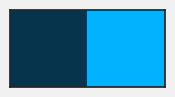

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

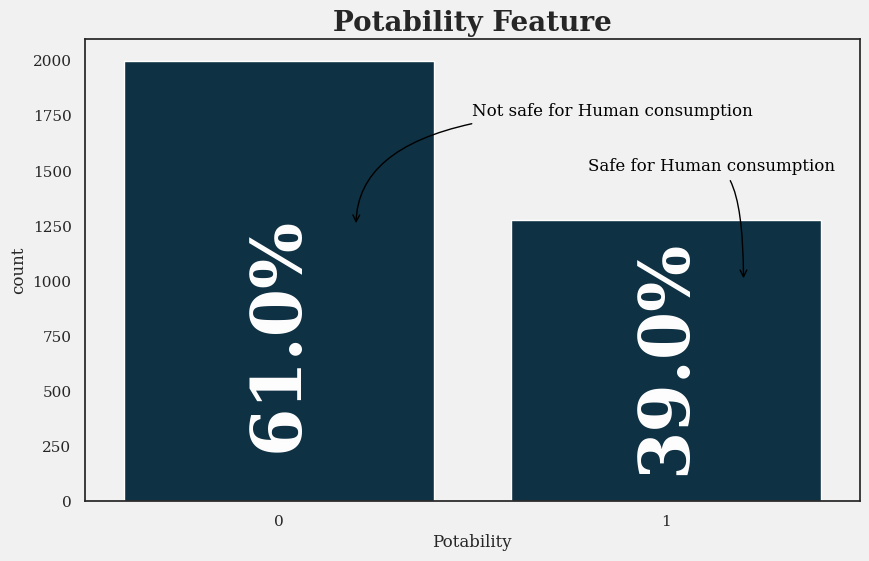

In [15]:
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')


Distribution plots

In [16]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


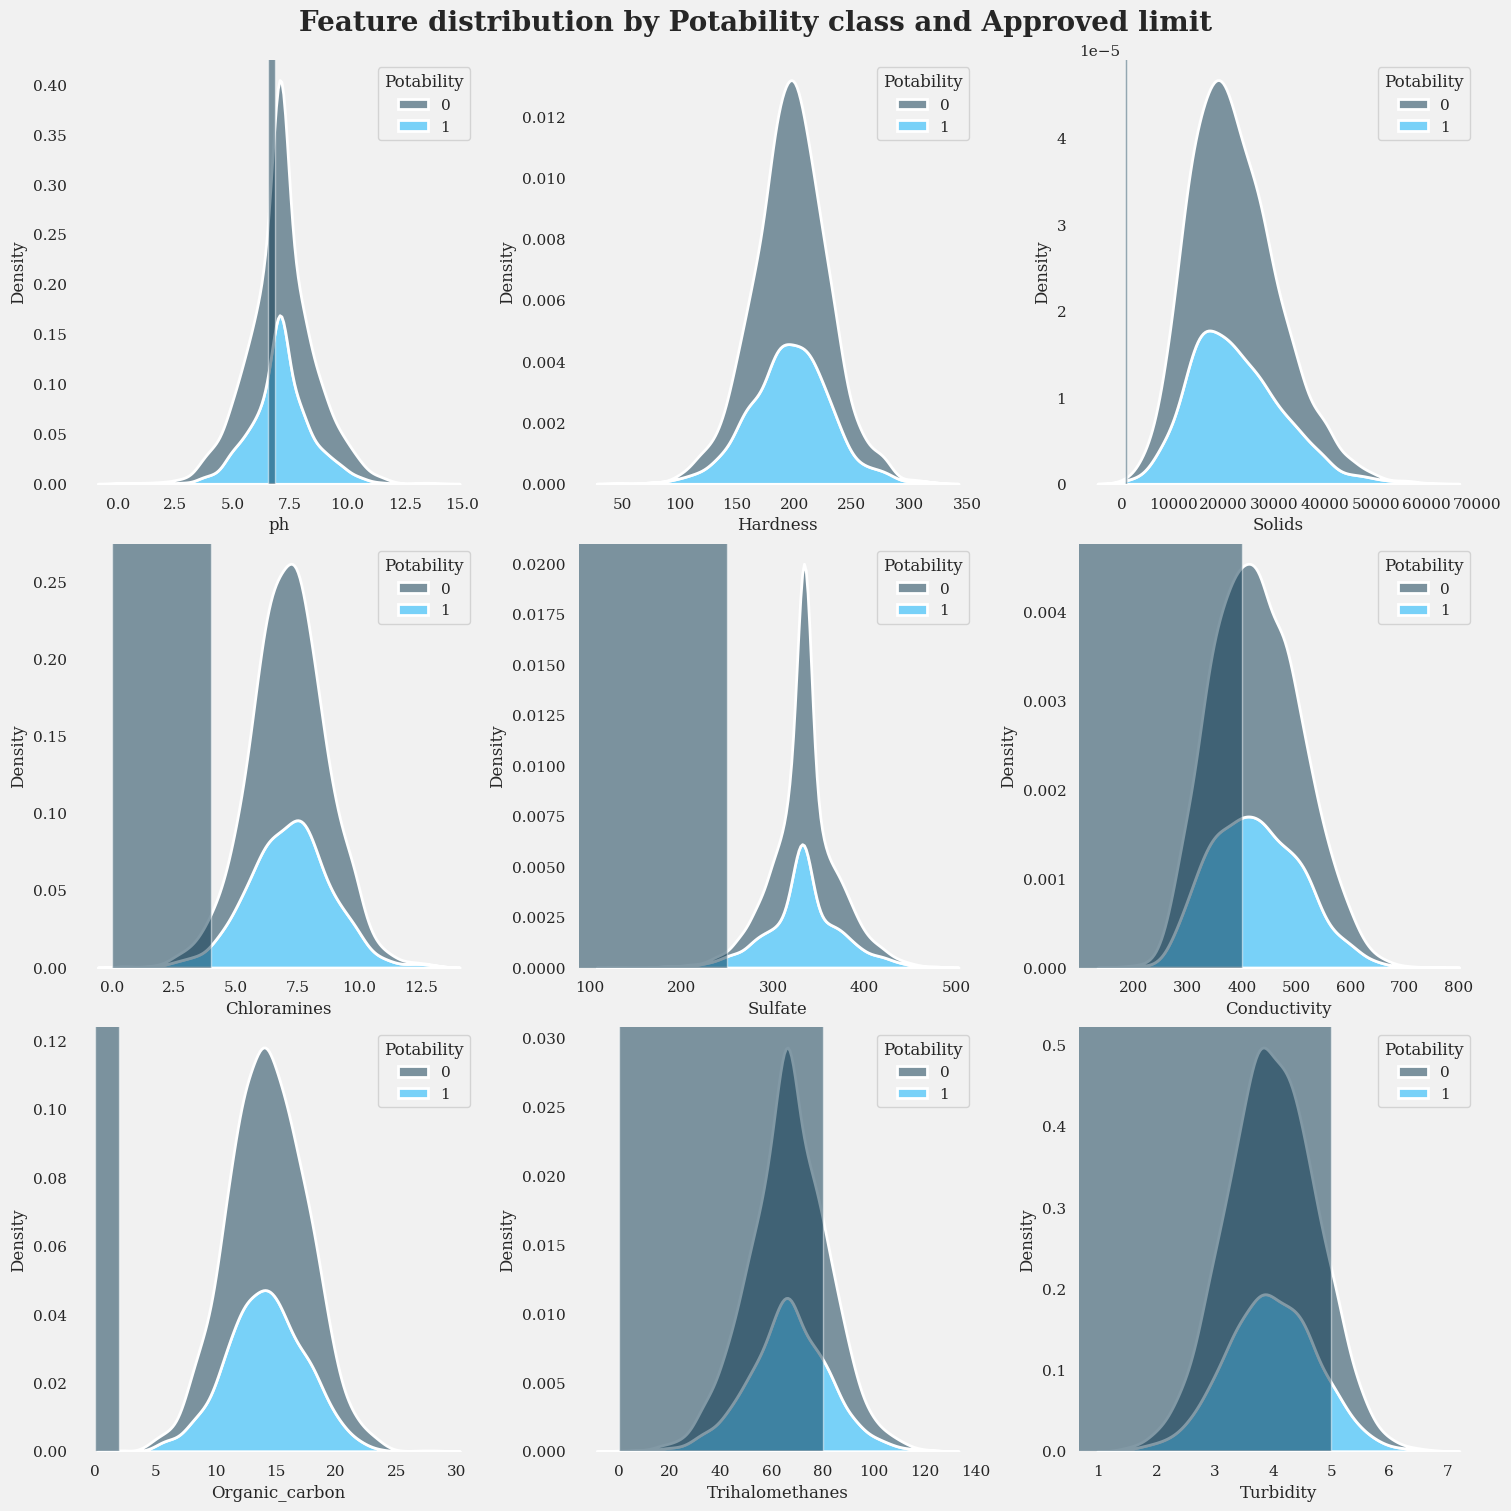

In [17]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

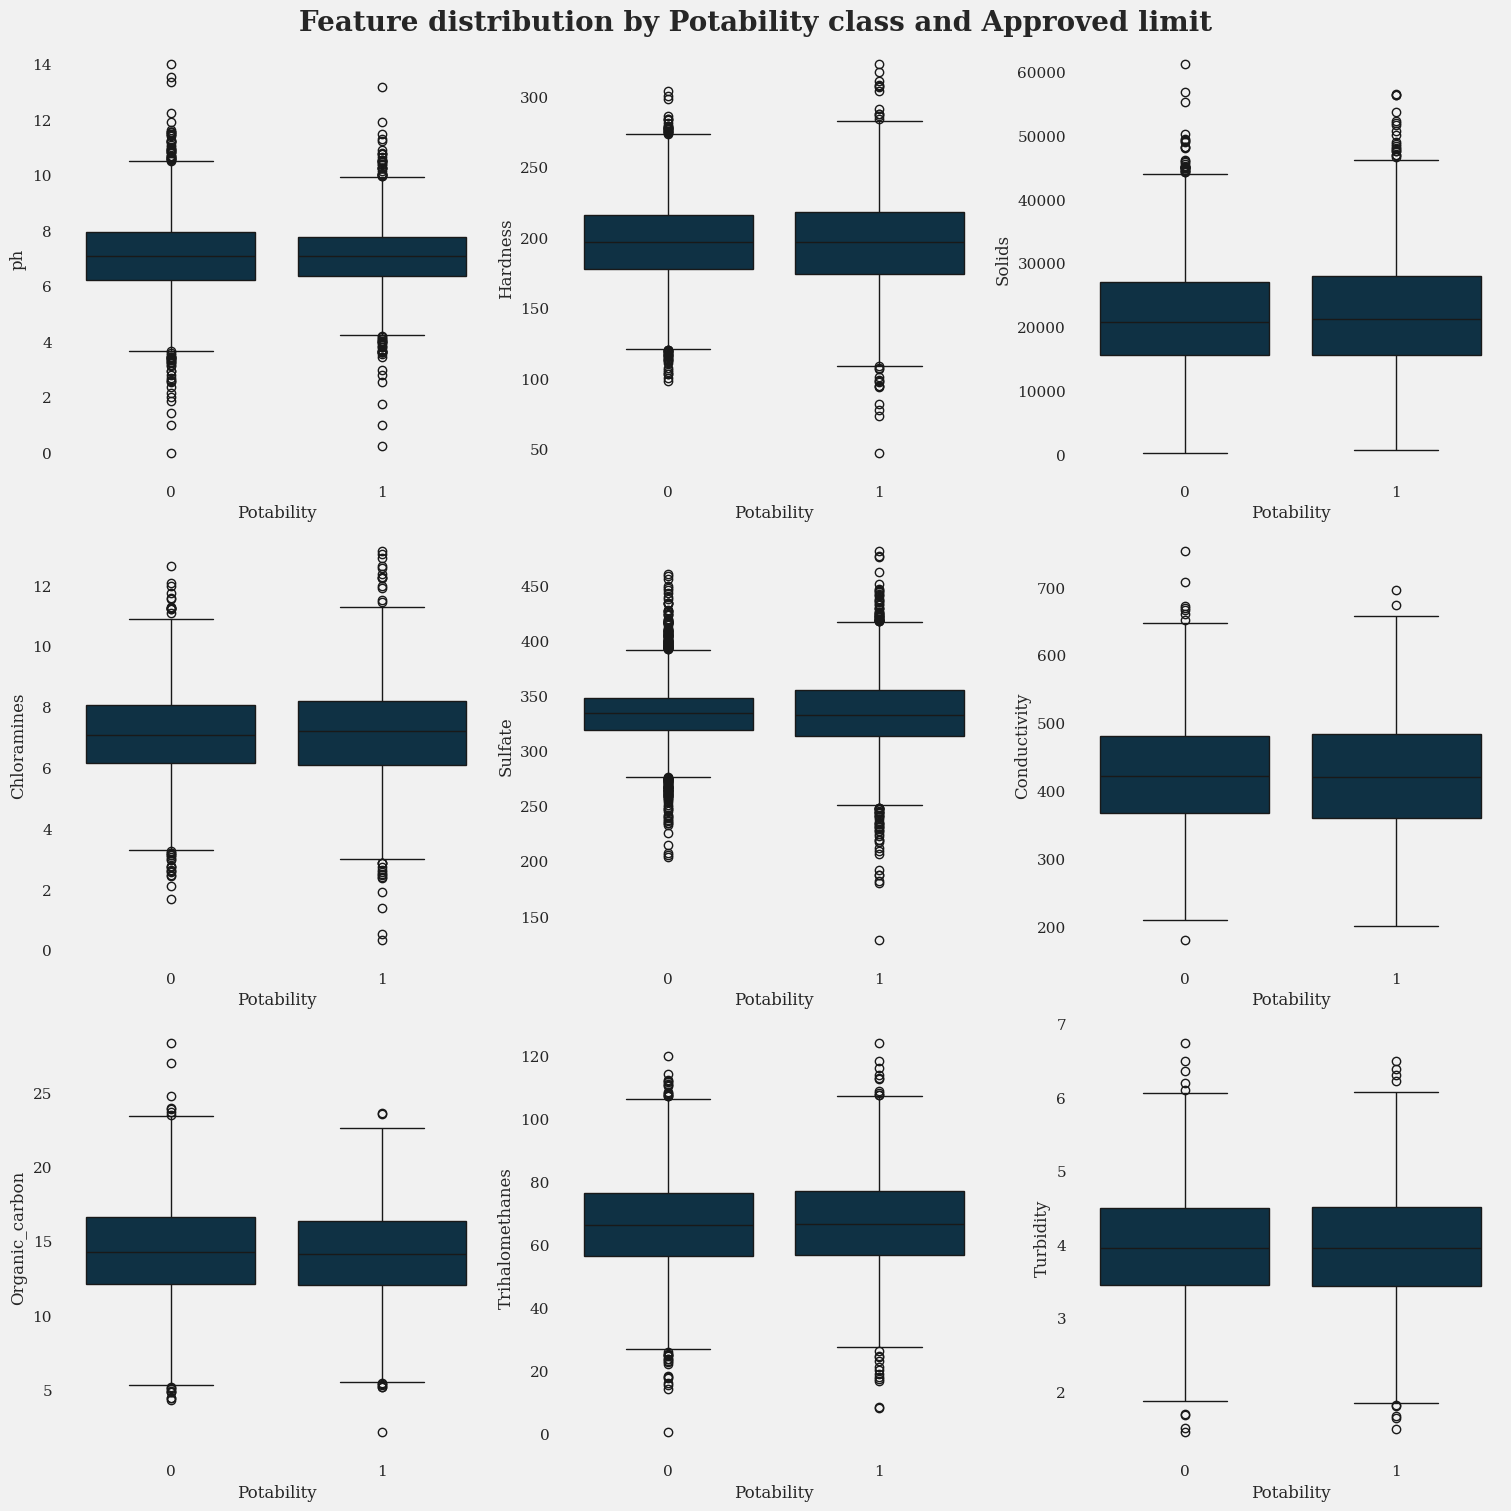

In [18]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)


Hypothesis testing

Ho (Null Hypothesis) - Mean for both samples/group are same

H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.

Significant level - 90%

Alpha - 0.5% (ie., 0.1)

p_value for ph is 0.825736218991395 we accept the null hypothesis
p_value for Hardness is 0.42854158703979384 we accept the null hypothesis
p_value for Solids is 0.05346363820392201 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022450390112 we accept the null hypothesis
p_value for Sulfate is 0.12292453686523334 we accept the null hypothesis
p_value for Conductivity is 0.6418845484669666 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746151346233 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.6759888897525917 we accept the null hypothesis
p_value for Turbidity is 0.9279391626783621 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

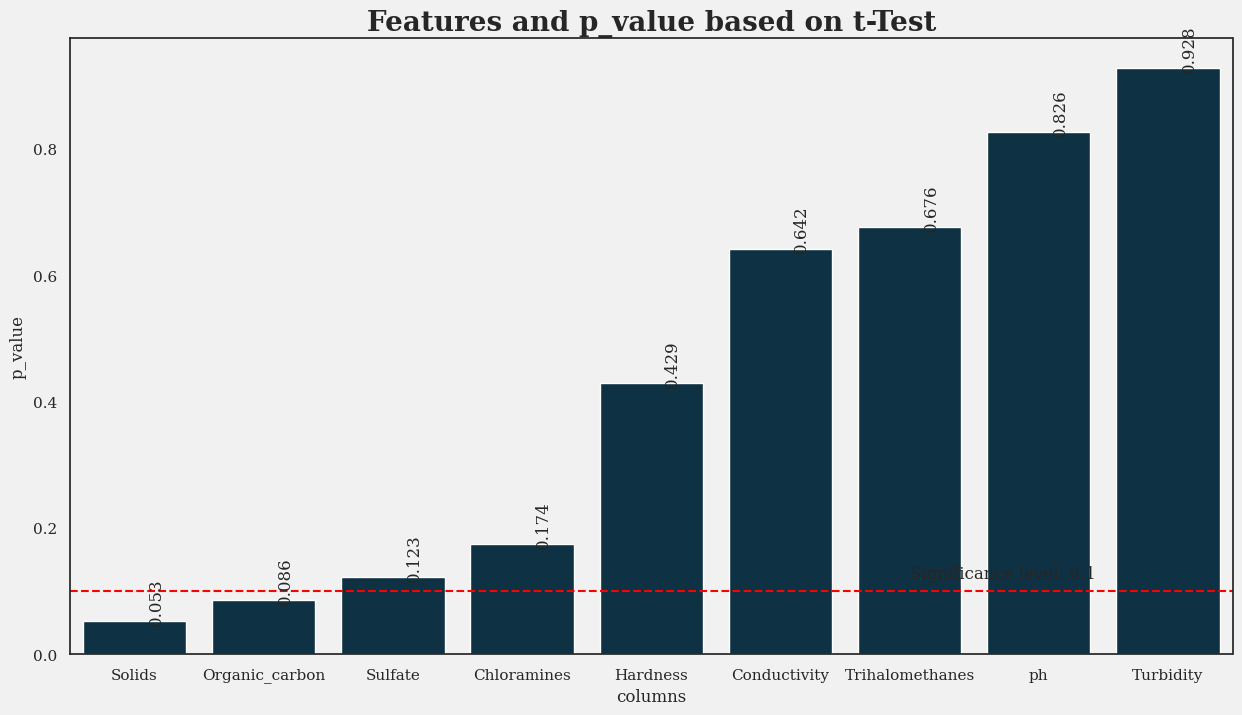

In [19]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

<Axes: >

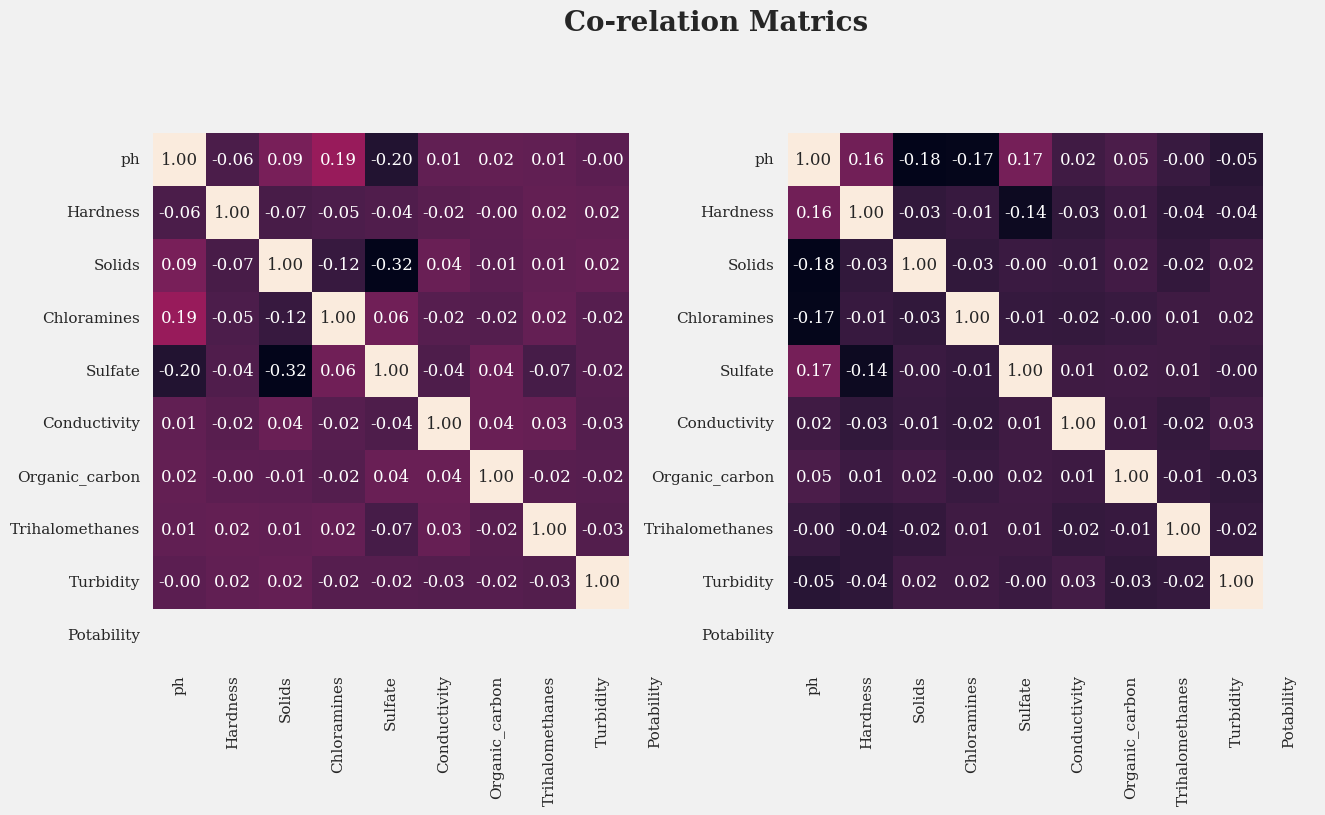

In [20]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<Axes: >

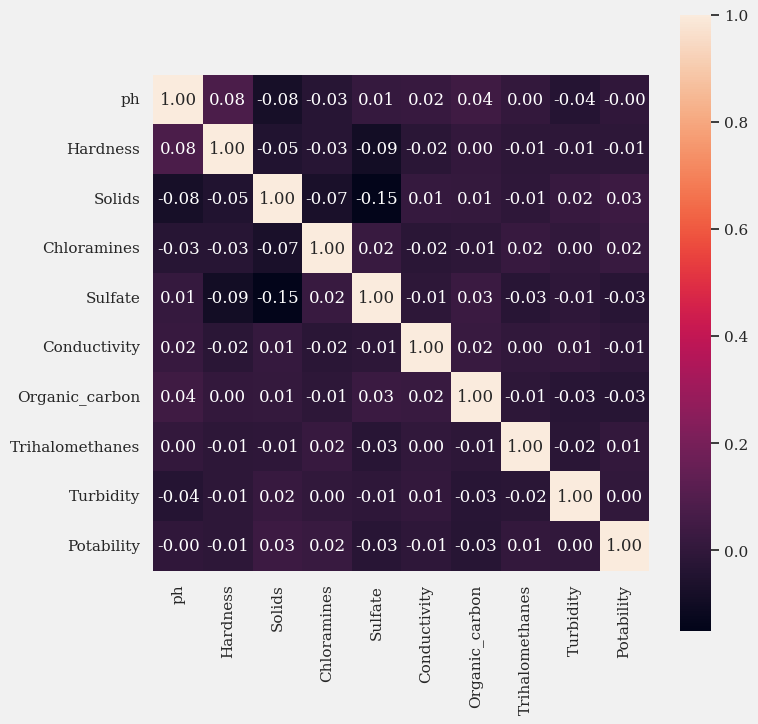

In [21]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

<Axes: >

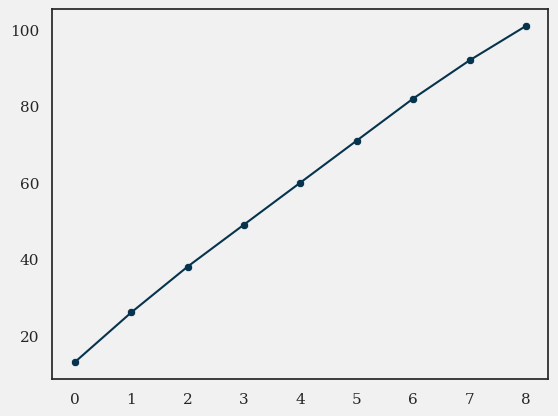

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

In [23]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [24]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.569883
5,KNeighborsClassifier(),0.661294
0,AdaBoostClassifier(),0.690517
3,DecisionTreeClassifier(),0.733866
2,GradientBoostingClassifier(),0.754703
1,BaggingClassifier(),0.758401


From the above basic modeling techinique, average cv score for GradientBoosting & BaggingClassifier is high compared to other models.

we will do fine tuning with the GradientBoosting & Bagging Classifier models

In [26]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")

param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")


Best Estimator: {'n_estimators': 700} , Best Score : 0.775203880209802
Best Estimator: {'n_estimators': 500} , Best Score : 0.783598781794597


so, Gradientboosting model gives slightly higher accuracy than the BaggingClassifier model.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81       510
           1       0.67      0.78      0.72       309

    accuracy                           0.77       819
   macro avg       0.76      0.77      0.76       819
weighted avg       0.78      0.77      0.77       819



In [29]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.82      0.78      0.80       510
           1       0.66      0.71      0.69       309

    accuracy                           0.75       819
   macro avg       0.74      0.75      0.74       819
weighted avg       0.76      0.75      0.75       819



From this we can infer that 77% H2O is potable and can be used for drinking.